# Estudo do tempo de corrida em minutos por km (pace) 📚 <br> Análise a partir da Maratona de Boston 2023 🏃
> Autora: Luiza Kuze <br> Data: 02/12/2023


In [146]:
#@title Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as patches
import seaborn as sns
plt.style.use('ggplot')

In [147]:
#@title Leitura do arquivo

uri = "./boston_marathon_2023.csv"
maratona = pd.read_csv(uri)

## Análise da Estrutura do Dataset 📖

In [148]:
#@title Verificando duplicações

maratona.duplicated().any()

False

In [149]:
#@title Renomeando colunas

maratona.columns = ["divisao_faixa", "posicao_geral", "posicao_genero", "posicao_faixa", "nome", "equipe", "numero_peito", "tempo_meia_maratona", "tempo_liquido_maratona", "tempo_bruto_maratona", "genero", "tempo_meia_maratona_segundos", "tempo_liquido_maratona_segundos", "tempo_bruto_maratona_segundos", "tempo_liquido_maratona_minutos"]
maratona.head()

,divisao_faixa,posicao_geral,posicao_genero,posicao_faixa,nome,equipe,numero_peito,tempo_meia_maratona,tempo_liquido_maratona,tempo_bruto_maratona,genero,tempo_meia_maratona_segundos,tempo_liquido_maratona_segundos,tempo_bruto_maratona_segundos,tempo_liquido_maratona_minutos
0,18-39,1,1,1,"Chebet, Evans",Team–,1,1H 2M 20S,2H 5M 54S,2H 5M 54S,M,3740.0,7554,7554,125.900000
1,18-39,2,2,2,"Geay, Gabriel",Team–,3,1H 2M 20S,2H 6M 4S,2H 6M 4S,M,3740.0,7564,7564,126.066667
2,18-39,3,3,3,"Kipruto, Benson",Team–,5,1H 2M 19S,2H 6M 6S,2H 6M 6S,M,3739.0,7566,7566,126.100000
3,18-39,4,4,4,"Korir, Albert",Team–,19,1H 2M 20S,2H 8M 1S,2H 8M 1S,M,3740.0,7681,7681,128.016667
4,18-39,5,5,5,"Talbi, Zouhair",Team–,31,1H 2M 20S,2H 8M 35S,2H 8M 35S,M,3740.0,7715,7715,128.583333


In [150]:
#@title Adicionando o 'Pace' à tabela

maratona['pace'] = maratona['tempo_liquido_maratona_minutos'] / 42
maratona.head()

,divisao_faixa,posicao_geral,posicao_genero,posicao_faixa,nome,equipe,numero_peito,tempo_meia_maratona,tempo_liquido_maratona,tempo_bruto_maratona,genero,tempo_meia_maratona_segundos,tempo_liquido_maratona_segundos,tempo_bruto_maratona_segundos,tempo_liquido_maratona_minutos,pace
0,18-39,1,1,1,"Chebet, Evans",Team–,1,1H 2M 20S,2H 5M 54S,2H 5M 54S,M,3740.0,7554,7554,125.900000,2.997619
1,18-39,2,2,2,"Geay, Gabriel",Team–,3,1H 2M 20S,2H 6M 4S,2H 6M 4S,M,3740.0,7564,7564,126.066667,3.001587
2,18-39,3,3,3,"Kipruto, Benson",Team–,5,1H 2M 19S,2H 6M 6S,2H 6M 6S,M,3739.0,7566,7566,126.100000,3.002381
3,18-39,4,4,4,"Korir, Albert",Team–,19,1H 2M 20S,2H 8M 1S,2H 8M 1S,M,3740.0,7681,7681,128.016667,3.048016
4,18-39,5,5,5,"Talbi, Zouhair",Team–,31,1H 2M 20S,2H 8M 35S,2H 8M 35S,M,3740.0,7715,7715,128.583333,3.061508


In [151]:
#@title Visualização geral

maratona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26598 entries, 0 to 26597
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   divisao_faixa                    26598 non-null  object 
 1   posicao_geral                    26598 non-null  int64  
 2   posicao_genero                   26598 non-null  int64  
 3   posicao_faixa                    26598 non-null  int64  
 4   nome                             26598 non-null  object 
 5   equipe                           26598 non-null  object 
 6   numero_peito                     26598 non-null  object 
 7   tempo_meia_maratona              26526 non-null  object 
 8   tempo_liquido_maratona           26598 non-null  object 
 9   tempo_bruto_maratona             26598 non-null  object 
 10  genero                           26598 non-null  object 
 11  tempo_meia_maratona_segundos     26526 non-null  float64
 12  tempo_liquido_mara

## Análise do Pace e Gênero 👩‍🦱👨‍🦰

> ### Motivação
>- Como o pace difere entre homens e mulheres?
>- Como o pace médio varia em diferentes faixas etárias para homens e mulheres?
>- Qual é a distribuição percentual de homens e mulheres na maratona?
>- Quantos indivíduos mais rápidos do gênero oposto?

In [181]:
#@title Dividindo a população em 2 amostras

homens = maratona[maratona['genero'] == 'M'].reset_index()
mulheres = maratona[maratona['genero'] == 'W'].reset_index()

In [182]:
#@title 1ª Amostra - Homens
homens.head(3)

,index,divisao_faixa,posicao_geral,posicao_genero,posicao_faixa,nome,equipe,numero_peito,tempo_meia_maratona,tempo_liquido_maratona,tempo_bruto_maratona,genero,tempo_meia_maratona_segundos,tempo_liquido_maratona_segundos,tempo_bruto_maratona_segundos,tempo_liquido_maratona_minutos,pace
0,0,18-39,1,1,1,"Chebet, Evans",Team–,1,1H 2M 20S,2H 5M 54S,2H 5M 54S,M,3740.0,7554,7554,125.900000,2.997619
1,1,18-39,2,2,2,"Geay, Gabriel",Team–,3,1H 2M 20S,2H 6M 4S,2H 6M 4S,M,3740.0,7564,7564,126.066667,3.001587
2,2,18-39,3,3,3,"Kipruto, Benson",Team–,5,1H 2M 19S,2H 6M 6S,2H 6M 6S,M,3739.0,7566,7566,126.100000,3.002381


In [183]:
#@title 2ª Amostra - Mulheres
mulheres.head(3)

,index,divisao_faixa,posicao_geral,posicao_genero,posicao_faixa,nome,equipe,numero_peito,tempo_meia_maratona,tempo_liquido_maratona,tempo_bruto_maratona,genero,tempo_meia_maratona_segundos,tempo_liquido_maratona_segundos,tempo_bruto_maratona_segundos,tempo_liquido_maratona_minutos,pace
0,15175,18-39,36,1,1,"Obiri, Hellen",Team–,122,1H 11M 29S,2H 21M 38S,2H 21M 38S,W,4289.0,8498,8498,141.633333,3.372222
1,15176,18-39,40,2,2,"Beriso, Amane",Team–,102,1H 11M 30S,2H 21M 50S,2H 21M 50S,W,4290.0,8510,8510,141.833333,3.376984
2,15177,18-39,41,3,3,"Salpeter, Lonah",Team–,105,1H 11M 29S,2H 21M 57S,2H 21M 57S,W,4289.0,8517,8517,141.950000,3.379762


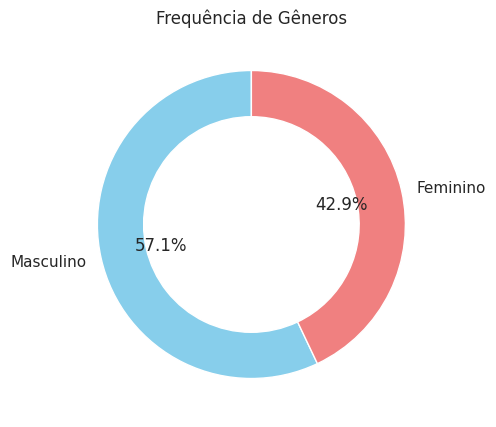

In [184]:
#@title Frequência de Gêneros
df = maratona['genero'].value_counts()

# configura gráfico
df.plot(kind='pie', autopct='%1.1f%%', labels=['Masculino','Feminino'],  startangle=90, figsize=(5, 5), colors=['skyblue', 'lightcoral'], wedgeprops=dict(width=0.3))

# rótulos do gráfico
plt.title("Frequência de Gêneros")
plt.ylabel("")

# mostrar gráfico
plt.show()

In [185]:
#@title Média do pace geral e por gênero

mp_todos = maratona['pace'].mean()
mp_homens = homens['pace'].mean()
mp_mulheres = mulheres['pace'].mean()

print(f'Média Pace:\nPara todos: {mp_todos}\nPara homens: {mp_homens}\nPara mulheres: {mp_mulheres}')


Média Pace:
Para todos: 5.298070209360532
Para homens: 5.057744645799011
Para mulheres: 5.617333137404485


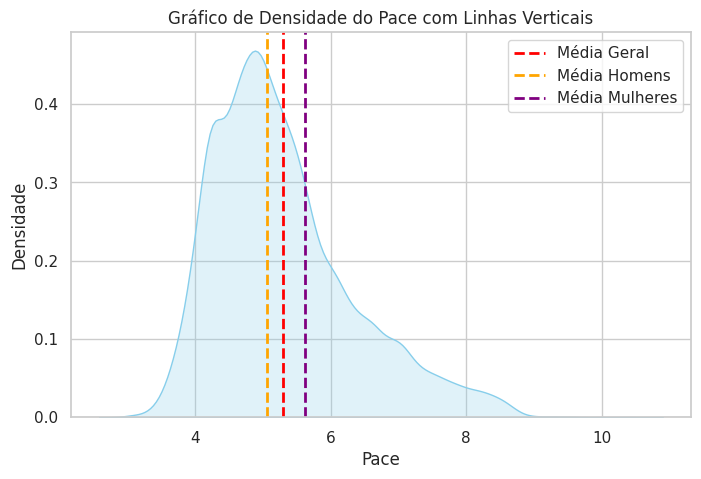

In [186]:
#@title Densidade da média do pace geral e por gênero

# configuração do gráfico
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# densidade da média do pace
sns.kdeplot(maratona['pace'], color='skyblue', fill=True)

# linha vertical para média geral
plt.axvline(mp_todos, color='red', linestyle='dashed', linewidth=2, label='Média Geral')

# média do pace para homens
plt.axvline(mp_homens, color='orange', linestyle='dashed', linewidth=2, label='Média Homens')

# média do pace para mulheres
plt.axvline(mp_mulheres, color='purple', linestyle='dashed', linewidth=2, label='Média Mulheres')

# rótulos do gráfico
plt.title('Gráfico de Densidade do Pace com Linhas Verticais')
plt.xlabel('Pace')
plt.ylabel('Densidade')
plt.legend()

# mostrar gráfico
plt.show()


In [187]:
#@title desvio padrão
dp_todos = maratona['pace'].std()
print('Desvio padrão', dp_todos)

Desvio padrão 1.0417826762984979


<ipython-input-188-f5f9570880c3>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(homens['pace'], shade=True, color='skyblue', label='Homens')
<ipython-input-188-f5f9570880c3>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mulheres['pace'], shade=True, color='lightcoral', label='Mulheres')


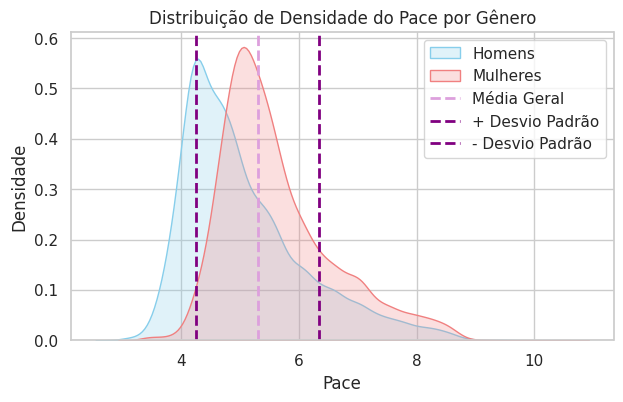

In [188]:
#title Densidade do pace por gênero

# configuração do gráfico
plt.figure(figsize=(7, 4))
sns.set(style="whitegrid")

# gráfico de densidade
## para homens
sns.kdeplot(homens['pace'], shade=True, color='skyblue', label='Homens')
## para mulheres
sns.kdeplot(mulheres['pace'], shade=True, color='lightcoral', label='Mulheres')

# linhas verticais com informações da média geral
plt.axvline(mp_todos, color='plum', linestyle='dashed', linewidth=2, label='Média Geral')
plt.axvline((mp_todos + dp_todos), color='purple', linestyle='dashed', linewidth=2, label='+ Desvio Padrão')
plt.axvline((mp_todos - dp_todos), color='purple', linestyle='dashed', linewidth=2, label='- Desvio Padrão')

# rótulos do gráfico
plt.title('Distribuição de Densidade do Pace por Gênero')
plt.xlabel('Pace')
plt.ylabel('Densidade')
plt.legend()

# mostra o gráfico
plt.show()

In [189]:
#@title Contagem de indivíduos com o pace menor por gênero

## pegando o mesmo número de elementos para os homens
tm_homens= homens.head(len(mulheres))

# homens com pace menor que mulheres
qt_homens_menor = (tm_homens['pace'] < mulheres['pace']).sum()

# mulheres com pace menor que homens
qt_mulheres_menor = (mulheres['pace'] < tm_homens['pace']).sum()

print(f'Número total de homens: {len(homens)} e Número total de mulheres: {len(mulheres)}\n')
print(f'Homens com pace menor que mulheres: {qt_homens_menor} (de um total de {len(tm_homens)} homens)')
print(f'Mulheres com pace menor que homens: {qt_mulheres_menor} (de um total de {len(mulheres)} mulheres)')

Número total de homens: 15175 e Número total de mulheres: 11423

Homens com pace menor que mulheres: 10184 (de um total de 11423 homens)
Mulheres com pace menor que homens: 1239 (de um total de 11423 mulheres)


In [190]:
#@title Média do pace por faixa etária

# para todos
mpf_todos = maratona.groupby('divisao_faixa')['pace'].mean().reset_index()

# para homens
mpf_homens = homens.groupby('divisao_faixa')['pace'].mean().reset_index()

# para mulheres
mpf_mulheres = mulheres.groupby('divisao_faixa')['pace'].mean().reset_index()

print(f'Média do pace por faixa etária:\nPara todos: {mpf_todos}\nPara homens: {mpf_homens}\nPara mulheres: {mpf_mulheres}')

Média do pace por faixa etária:
Para todos:   divisao_faixa      pace
0         18-39  5.037818
1         40-44  5.134520
2         45-49  5.278441
3         50-54  5.474871
4         55-59  5.652182
5         60-64  5.856056
6         65-69  6.153434
7         70-74  6.557524
8         75-79  7.055347
9           80+  7.169127
Para homens:   divisao_faixa      pace
0         18-39  4.678720
1         40-44  4.833377
2         45-49  5.006103
3         50-54  5.269526
4         55-59  5.435386
5         60-64  5.709755
6         65-69  6.022541
7         70-74  6.432884
8         75-79  7.055151
9           80+  7.092989
Para mulheres:   divisao_faixa      pace
0         18-39  5.426327
1         40-44  5.493871
2         45-49  5.615978
3         50-54  5.823973
4         55-59  6.030443
5         60-64  6.164204
6         65-69  6.478595
7         70-74  6.985721
8         75-79  7.056310
9           80+  7.283333


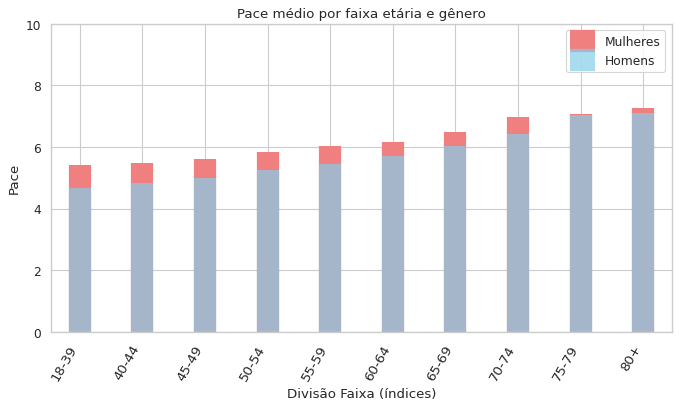

In [191]:
#@title Pace médio por faixa etária e gênero

# figura e eixo
fig, ax = plt.subplots(figsize=(10, 5), facecolor='white', dpi=80)

# barras verticais para média de pace de mulheres e homens
ax.vlines(x=mpf_mulheres.index, ymin=0, ymax=mpf_mulheres['pace'], color='lightcoral', alpha=1, linewidth=20, label='Mulheres')
ax.vlines(x=mpf_homens.index, ymin=0, ymax=mpf_homens['pace'], color='skyblue', alpha=0.7, linewidth=20, label='Homens')

# parâmetros do eixo horizontal
plt.xticks(mpf_homens.index, mpf_homens['divisao_faixa'], rotation=60, horizontalalignment='right', fontsize=12)

ax.set(ylabel='Pace', ylim=(0, 10))
ax.set(xlabel='Divisão Faixa (índices)')

plt.legend()
plt.title('Pace médio por faixa etária e gênero')
plt.show()

## Análise Pace e Equipes de corrida 👭

> ## Motivação
>- Qual a equipe mais veloz?
>- Ter uma equipe te torna mais veloz?
>- Qual o percentual de corredores com e sem equipe?
>- Como difere o pace entre corredores com e sem equpe?

In [163]:
#@title Dividindo a população em 2 amostras

sem_equipe = maratona[maratona['equipe'] == 'Team–'].reset_index()
com_equipe = maratona[maratona['equipe'] != 'Team–'].reset_index()

In [164]:
#@title 1ª Amostra - Corredores com equipe
com_equipe.head(3)

,index,divisao_faixa,posicao_geral,posicao_genero,posicao_faixa,nome,equipe,numero_peito,tempo_meia_maratona,tempo_liquido_maratona,tempo_bruto_maratona,genero,tempo_meia_maratona_segundos,tempo_liquido_maratona_segundos,tempo_bruto_maratona_segundos,tempo_liquido_maratona_minutos,pace
0,9,18-39,10,10,10,"Mcdonald, Matthew",TeamBoston Athletic Association,24,1H 3M 59S,2H 10M 17S,2H 10M 17S,M,3839.0,7817,7817,130.283333,3.101984
1,16,18-39,17,17,17,"Flavin, Jp",TeamHansons-Brooks Distance Project,48,1H 5M 40S,2H 13M 27S,2H 13M 27S,M,3940.0,8007,8007,133.450000,3.177381
2,24,18-39,25,25,25,"Hampton, Jonas",TeamBoston Athletic Association,28,1H 5M 33S,2H 17M 5S,2H 17M 5S,M,3933.0,8225,8225,137.083333,3.263889


In [165]:
#@title 2ª Amostra - Corredores sem equipe
sem_equipe.head(3)

,index,divisao_faixa,posicao_geral,posicao_genero,posicao_faixa,nome,equipe,numero_peito,tempo_meia_maratona,tempo_liquido_maratona,tempo_bruto_maratona,genero,tempo_meia_maratona_segundos,tempo_liquido_maratona_segundos,tempo_bruto_maratona_segundos,tempo_liquido_maratona_minutos,pace
0,0,18-39,1,1,1,"Chebet, Evans",Team–,1,1H 2M 20S,2H 5M 54S,2H 5M 54S,M,3740.0,7554,7554,125.900000,2.997619
1,1,18-39,2,2,2,"Geay, Gabriel",Team–,3,1H 2M 20S,2H 6M 4S,2H 6M 4S,M,3740.0,7564,7564,126.066667,3.001587
2,2,18-39,3,3,3,"Kipruto, Benson",Team–,5,1H 2M 19S,2H 6M 6S,2H 6M 6S,M,3739.0,7566,7566,126.100000,3.002381


In [166]:
#@title Número de equipes
num_equipes = com_equipe['equipe'].nunique()
print('Número de equipes', num_equipes)

Número de equipes 85


In [167]:
#@title Equipes com maior número de corredores

com_equipe['equipe'].value_counts().head()


TeamTracksmith Boston Hares        46
TeamMisty Mountain Runners         43
TeamCharlotte Running Club         42
TeamBoston Athletic Association    41
TeamSan Diego Track Club           40
Name: equipe, dtype: int64

In [168]:
#@title Número de corredores com e sem equipe

# com equipe
nc_com_equipe = com_equipe['nome'].nunique()

# sem equipe
nc_sem_equipe = sem_equipe['nome'].nunique()

print(f'Número de corredores\nCom equipe: {nc_com_equipe}\nSem equipe: {nc_sem_equipe}')

Número de corredores
Com equipe: 1257
Sem equipe: 25092


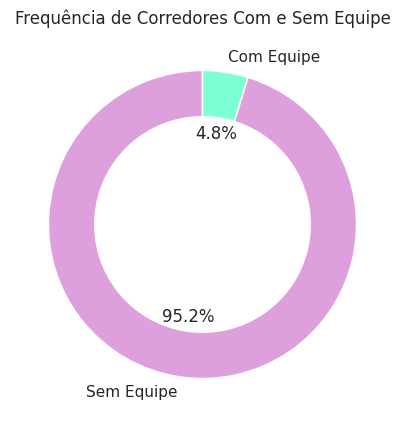

In [169]:
#@title Frequência de corredores com e sem equipe

# novo dataframe para contagem de corredores com e sem equipe
df_frequencia = pd.DataFrame({'Frequência': [nc_sem_equipe, nc_com_equipe]},
                             index=['Sem Equipe', 'Com Equipe'])

# configuração gráfico de pizza
df_frequencia['Frequência'].plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(5, 5),
                                labels=df_frequencia.index, colors=['plum', 'aquamarine'], wedgeprops=dict(width=0.3))

# rótulos do gráfico
plt.title("Frequência de Corredores Com e Sem Equipe")
plt.ylabel("")

# mostrar gráfico
plt.show()

In [170]:
#@title Pace médio corredores com e sem equipe
mp_com_equipe = com_equipe['pace'].mean()
mp_sem_equipe = sem_equipe['pace'].mean()

print(f'Pace médio\nCom equipe: {mp_com_equipe}\nSem equipe: {mp_sem_equipe}')

Pace médio
Com equipe: 4.8352736139500845
Sem equipe: 5.321045667806716


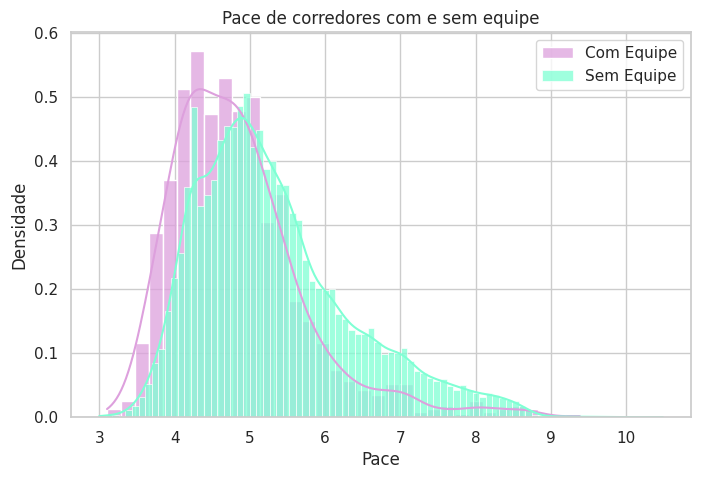

In [171]:
#@title Densidade de paces com e sem equipe

# configura o gráfico
plt.figure(figsize=(8, 5))

# normalizar os histogramas
sns.histplot(com_equipe['pace'], color='plum', alpha=0.75, label='Com Equipe', kde=True, stat='density')
sns.histplot(sem_equipe['pace'], color='aquamarine', alpha=0.75, label='Sem Equipe', kde=True, stat='density')

# rótulos do gráfico
plt.xlabel('Pace')
plt.ylabel('Densidade')
plt.title("Pace de corredores com e sem equipe")
plt.legend()
plt.show()


In [172]:
#@title Média do pace por equipe
mp_equipes = maratona.groupby('equipe')['pace'].mean().reset_index()
print(mp_equipes)

                                     equipe      pace
0                      TeamAl-limite Mexico  4.806587
1                  TeamAnn Arbor Track Club  4.119048
2                      TeamBEN Running Club  4.726401
3                TeamBakersfield Greyhounds  4.803968
4                TeamBattle Road Track Club  4.188889
..                                      ...       ...
81         TeamWinner's Circle Running Club  5.509776
82                TeamWolfpack Running Club  4.406746
83  TeamYellowstone Valley Distance Project  4.637302
84               Teamsan Luis Distance Club  5.770679
85                                    Team–  5.321046

[86 rows x 2 columns]


In [173]:
#@title Pace médio por faixa etária para corredores com e sem equipe
mpf_com_equipe = com_equipe.groupby('divisao_faixa')['pace'].mean().reset_index()
mpf_sem_equipe = sem_equipe.groupby('divisao_faixa')['pace'].mean().reset_index()

print(f'Média Pace Faixa\nCom Equipe: {mpf_com_equipe}\nSem Equipe: {mpf_sem_equipe}')

Média Pace Faixa
Com Equipe:   divisao_faixa      pace
0         18-39  4.386089
1         40-44  4.674372
2         45-49  4.959868
3         50-54  5.086252
4         55-59  5.353505
5         60-64  5.537228
6         65-69  6.043264
7         70-74  6.847192
8         75-79  7.345337
Sem Equipe:   divisao_faixa      pace
0         18-39  5.069756
1         40-44  5.159612
2         45-49  5.293357
3         50-54  5.495728
4         55-59  5.664702
5         60-64  5.871578
6         65-69  6.159312
7         70-74  6.543151
8         75-79  7.034257
9           80+  7.169127


In [174]:
#Contagem de corredores por faixa etária com/sem equipe

nf_com_equipe = com_equipe['divisao_faixa'].value_counts()
nf_sem_equipe = sem_equipe['divisao_faixa'].value_counts()

print(f"Com Equipe: {nf_com_equipe}\nSem Equipe: {nf_sem_equipe}")

Com Equipe: 18-39    475
40-44    213
45-49    182
50-54    166
55-59     90
60-64     76
65-69     39
70-74     13
75-79      4
Name: divisao_faixa, dtype: int64
Sem Equipe: 18-39    9693
40-44    3906
45-49    3887
50-54    3093
55-59    2147
60-64    1561
65-69     731
70-74     262
75-79      55
80+         5
Name: divisao_faixa, dtype: int64


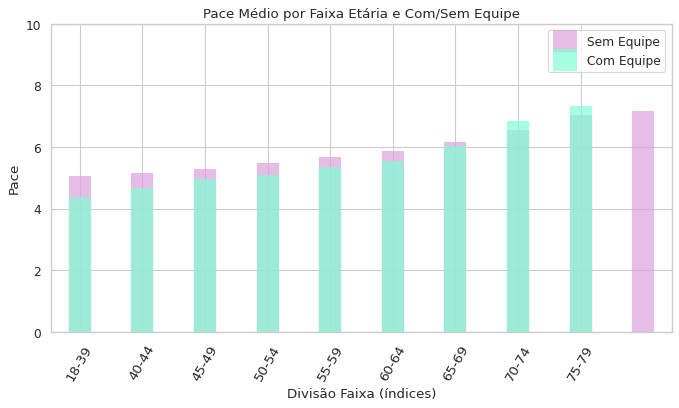

In [175]:
#@title Pace médio por faixa etária com/sem equipe

# configuração do gráfico
fig, ax = plt.subplots(figsize=(10, 5), facecolor='white', dpi=80)

# barras verticais com média do pace
## sem equipe
ax.vlines(x=mpf_sem_equipe.index, ymin=0, ymax=mpf_sem_equipe['pace'], color='plum', alpha=0.7, linewidth=20, label='Sem Equipe')
## com equipe
ax.vlines(x=mpf_com_equipe.index, ymin=0, ymax=mpf_com_equipe['pace'], color='aquamarine', alpha=0.7, linewidth=20, label='Com Equipe')


# rótulos
plt.xticks(mpf_com_equipe.index, mpf_com_equipe['divisao_faixa'], rotation=60, fontsize=12)
ax.set(ylabel='Pace', ylim=(0, 10))
ax.set(xlabel='Divisão Faixa (índices)')
plt.legend()
plt.title('Pace Médio por Faixa Etária e Com/Sem Equipe')

# mostrar gráfico
plt.show()


In [176]:
#@title Equipe mais veloz
com_equipe.min()

<ipython-input-176-dfa7973e2d69>:2: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  com_equipe.min()


index                                                 9
divisao_faixa                                     18-39
posicao_geral                                        10
posicao_genero                                       10
posicao_faixa                                         1
nome                                       Abela, Kathy
equipe                             TeamAl-limite Mexico
numero_peito                                      10005
tempo_liquido_maratona                       2H 10M 17S
tempo_bruto_maratona                         2H 10M 17S
genero                                                M
tempo_meia_maratona_segundos                     3839.0
tempo_liquido_maratona_segundos                    7817
tempo_bruto_maratona_segundos                      7817
tempo_liquido_maratona_minutos               130.283333
pace                                           3.101984
dtype: object

## Conclusão ✨

### Desempenho por gênero 👩‍🦱👨‍🦰

>- **Diferença no Pace:** Em geral, os homens apresentaram um pace menor em comparação com as mulheres, indicando que, em média, os homens nessa maratona foram mais rápidos.
>- **Participação Masculina Maior:** A maratona teve uma participação maior de homens em comparação com as mulheres.

### Desempenho das Equipes 👭


>- **Equipes tem Pace Menor:** A análise mostra que os corredores que fazem parte de equipes tiveram um pace menor do que aqueles sem equipe. Isso pode estar relacionado com treinamento especializado e que a presença de uma equipe pode influenciar positivamente o desempenho.
>- **Corrida e Longevidade:** Na faixa etária dos 50-54 anos, observa-se uma redução no número de corredores. Pode estar relacionado ao risco de lesões e mudança de prioridades.

In [177]:
#@title Homens, mulheres, com e sem equipe

# filtrando os dados para homens
homens_com_equipe = maratona[(maratona['equipe'] != 'Team–') & (maratona['genero'] == 'M')].reset_index()
homens_sem_equipe = maratona[(maratona['equipe'] == 'Team–') & (maratona['genero'] == 'M')].reset_index()

# filtrando  os dados para mulheres
mulheres_com_equipe = maratona[(maratona['equipe'] != 'Team–') & (maratona['genero'] == 'W')].reset_index()
mulheres_sem_equipe = maratona[(maratona['equipe'] == 'Team–') & (maratona['genero'] == 'W')].reset_index()

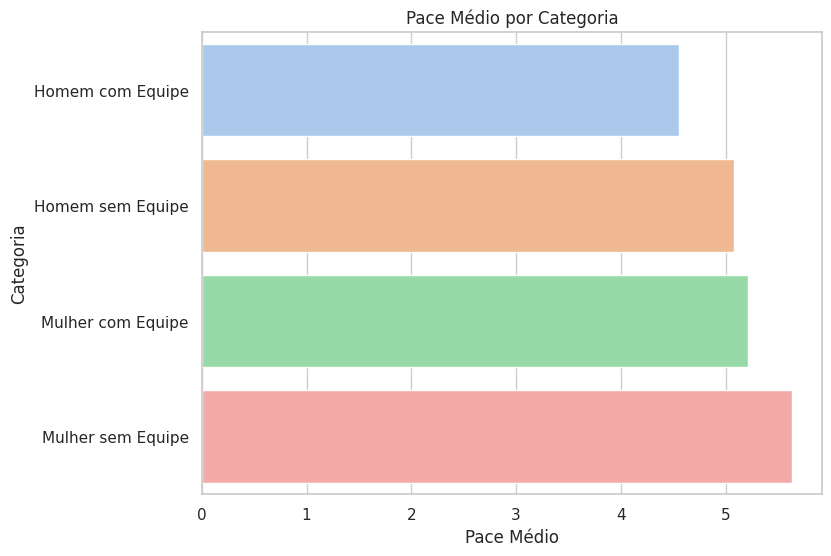

In [178]:
#@title Gráfico com relação de gênero e equipe

# pace médio para cada categoria
mp_homens_com_equipe = homens_com_equipe['pace'].mean()
mp_homens_sem_equipe = homens_sem_equipe['pace'].mean()
mp_mulheres_com_equipe = mulheres_com_equipe['pace'].mean()
mp_mulheres_sem_equipe = mulheres_sem_equipe['pace'].mean()

# novo dataframe com resultados
dados_pace = pd.DataFrame({
    'Categoria': ['Homem com Equipe', 'Homem sem Equipe', 'Mulher com Equipe', 'Mulher sem Equipe'],
    'Pace Médio': [mp_homens_com_equipe, mp_homens_sem_equipe, mp_mulheres_com_equipe, mp_mulheres_sem_equipe]
})

# configuração inicial
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# gráfico de barras
sns.barplot(x='Pace Médio', y='Categoria', data=dados_pace, palette='pastel')

# rótulos do gráfico
plt.title('Pace Médio por Categoria')
plt.xlabel('Pace Médio')
plt.ylabel('Categoria')

# mostrar o gráfico
plt.show()


In [179]:
#@title Valores dos paces por categoria
print(f'Média Pace\nHomens com equipe: {mp_homens_com_equipe}\nHomens sem equipe: {mp_homens_sem_equipe}\nMulheres com equipe: {mp_mulheres_com_equipe}\nMulheres sem equipe: {mp_mulheres_sem_equipe}')

Média Pace
Homens com equipe: 4.557699949504928
Homens sem equipe: 5.082760720765841
Mulheres com equipe: 5.210387182910547
Mulheres sem equipe: 5.637329104125118
